# Linear Regression examples

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# training data
n_samples = 20
X = np.arange(n_samples).reshape((n_samples, 1))
Y = 1.5 * X + np.random.randn(n_samples, 1) + 5
print(X.shape)
print(Y.shape)

(20, 1)
(20, 1)


In [3]:
# tf graph input
x_ph = tf.placeholder(tf.float32, [None, 1])
y_ph = tf.placeholder(tf.float32, [None, 1])

# model parameters
W = tf.Variable(tf.random_normal([1, 1]), name='weights')
b = tf.Variable(tf.zeros([1, 1]), name='bias')

In [4]:
# parameters
learning_rate = 0.1
epochs = 1000
display_step = 50

In [5]:
y_pred = tf.matmul(W, x_ph) + b
loss = tf.reduce_sum(tf.pow(y_pred - y_ph, 2)) / (2 * n_samples)
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [9]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(X, Y):
            sess.run(train, feed_dict={x_ph: [x], y_ph: [y]})
        if (epoch + 1) % display_step == 0:
            l = sess.run(loss, feed_dict={x_ph: [x], y_ph: [y]})
            print('epoch:', epoch+1, 'loss =', l, 'w =', sess.run(W[0][0]), 'b =', sess.run(b[0][0]))
    
    w_pred = sess.run(W[0][0])
    b_pred = sess.run(b[0][0])

epoch: 50 loss = 0.0040968163 w = 1.6477731 b = 3.326652
epoch: 100 loss = 0.0046135713 w = 1.5971636 b = 4.313007
epoch: 150 loss = 0.0047980156 w = 1.5797757 b = 4.651882
epoch: 200 loss = 0.004862403 w = 1.5738025 b = 4.768303
epoch: 250 loss = 0.0048845513 w = 1.5717498 b = 4.808305
epoch: 300 loss = 0.0048923953 w = 1.5710452 b = 4.8220468
epoch: 350 loss = 0.0048949267 w = 1.5708025 b = 4.8267713
epoch: 400 loss = 0.004895855 w = 1.5707192 b = 4.8283944
epoch: 450 loss = 0.004896193 w = 1.5706908 b = 4.828952
epoch: 500 loss = 0.004896193 w = 1.5706809 b = 4.8291426
epoch: 550 loss = 0.004896277 w = 1.5706775 b = 4.8292065
epoch: 600 loss = 0.004896277 w = 1.5706766 b = 4.8292255
epoch: 650 loss = 0.004896277 w = 1.5706766 b = 4.8292255
epoch: 700 loss = 0.004896277 w = 1.5706766 b = 4.8292255
epoch: 750 loss = 0.004896277 w = 1.5706766 b = 4.8292255
epoch: 800 loss = 0.004896277 w = 1.5706766 b = 4.8292255
epoch: 850 loss = 0.004896277 w = 1.5706766 b = 4.8292255
epoch: 900 loss

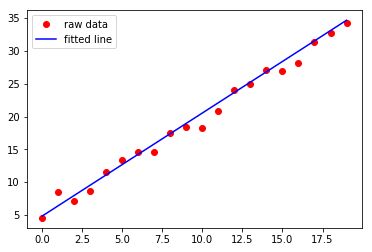

In [10]:
plt.plot(X, Y, 'ro', label='raw data')
plt.plot(X, w_pred * X + b_pred, 'b', label='fitted line')
plt.legend()
plt.show()